In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from math import floor, ceil
%matplotlib inline

# Assignment 1

## Question 1

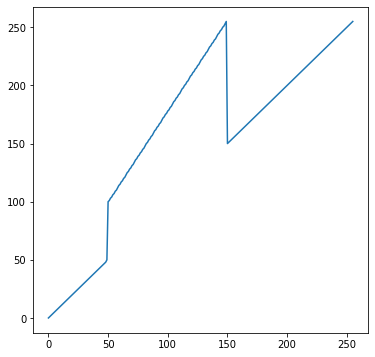

In [46]:
# creating intensity transformation
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)

transform = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
assert len(transform) == 256

_, ax = plt.subplots(figsize = (6, 6))
ax.plot(transform)
plt.show()

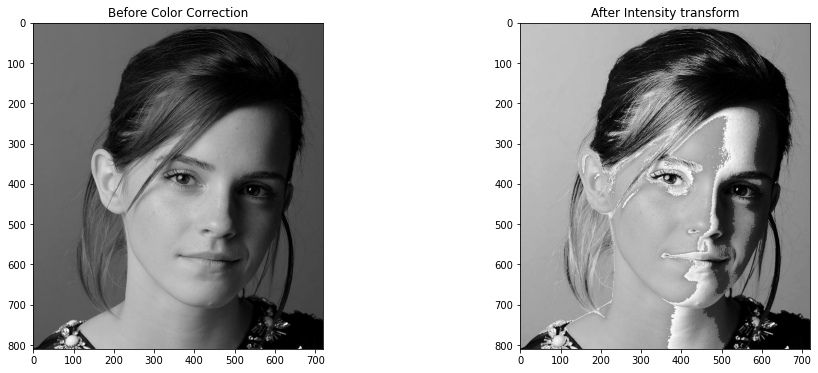

In [47]:
img = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

# do color correction
img_corr = cv.LUT(img, transform)

# do color convertion
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_corr = cv.cvtColor(img_corr, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].set_title("Before Color Correction")
ax[0].imshow(img)

ax[1].set_title("After Intensity transform")
ax[1].imshow(img_corr)

plt.show()

## Question 2

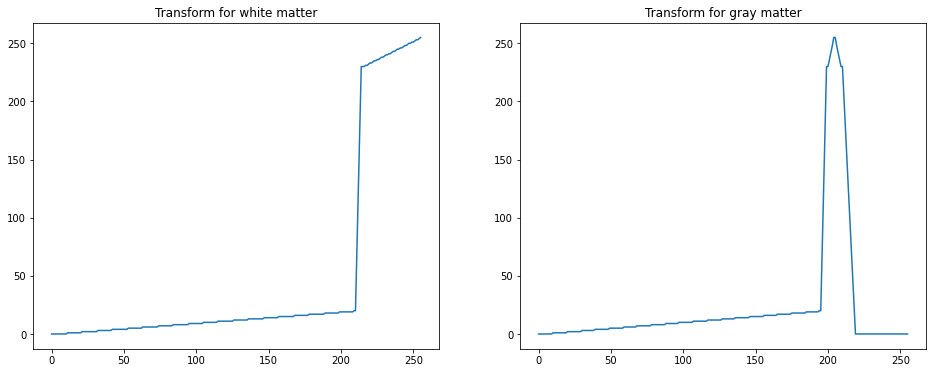

In [48]:
# creating trasnform
t11 = np.linspace(0, 20, 210)
t12 = np.linspace(20, 230, 5)
t13 = np.linspace(230, 255, 41)

transform1 = np.concatenate((t11, t12, t13), axis = 0).astype(np.uint8)

t21 = np.linspace(0, 20, 195)
t22 = np.linspace(20, 230, 5) # 200
t23 = np.linspace(230, 255,5) # 205
t24 = np.linspace(255, 230, 5) # 210
t25 = np.linspace(230, 0, 10)
t26 = np.linspace(0,0, 36)

transform2 = np.concatenate((t21, t22, t23, t24, t25, t26), axis = 0).astype(np.uint8)
assert len(transform1) == 256 and len(transform2) == 256

_, ax = plt.subplots(1,2, figsize = (16, 6))
ax[0].set_title("Transform for white matter")
ax[0].plot(transform1)
ax[1].set_title("Transform for gray matter")
ax[1].plot(transform2)
plt.show()

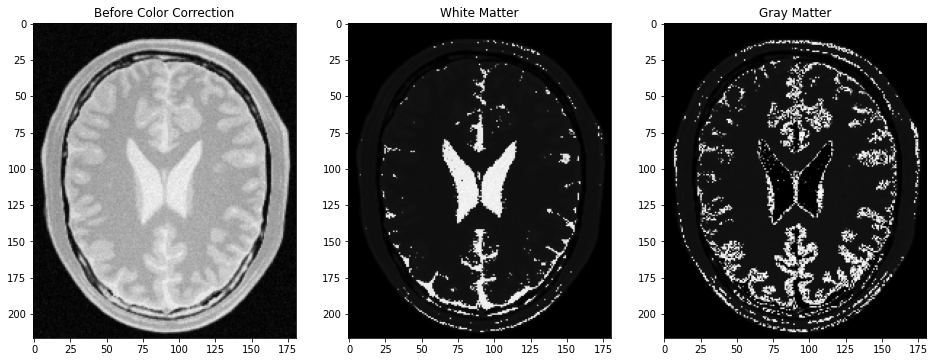

In [49]:
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# do color correction
img_white = cv.LUT(img, transform1)



img_gray = cv.LUT(img, transform2)

# do color convertion
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_white = cv.cvtColor(img_white, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_gray, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].set_title("Before Color Correction")
ax[0].imshow(img)

ax[1].set_title("White Matter")
ax[1].imshow(img_white)

ax[2].set_title("Gray Matter")
ax[2].imshow(img_gray)

plt.show()

## Question 3

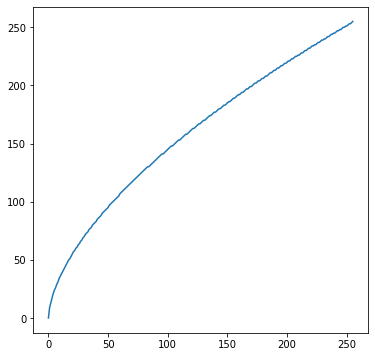

In [50]:
# Creating gamma correction
gamma_val = 0.6
transform = np.array([(p/255) ** gamma_val* 255 for p in range(256)], dtype=np.uint8)

_, ax = plt.subplots(figsize = (6, 6))
ax.plot(transform)
plt.show()

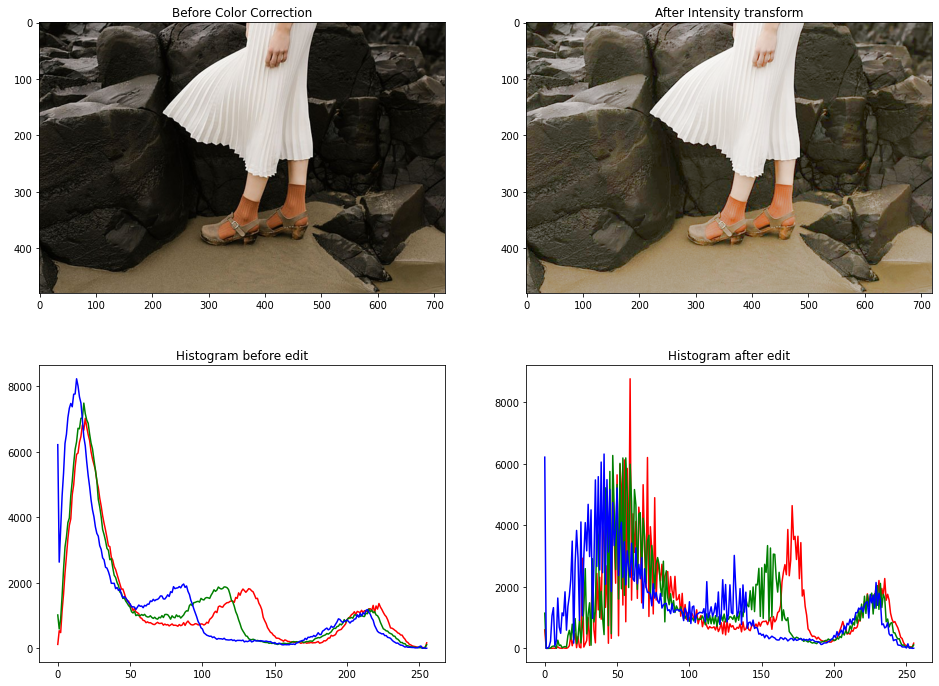

In [51]:
img = cv.imread(r'highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert img is not None

img_edit = cv.cvtColor(img, cv.COLOR_BGR2HLS) # converting to HSL color mode

# do color correction
img_edit[:,:,1] = cv.LUT(img_edit[:,:,1], transform)

# do color convertion
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_edit = cv.cvtColor(img_edit, cv.COLOR_HLS2RGB)

_, ax = plt.subplots(2, 2, figsize=(16, 12))

ax[0][0].set_title("Before Color Correction")
ax[0][0].imshow(img)

ax[0][1].set_title("After Intensity transform")
ax[0][1].imshow(img_edit)

ax[1][0].set_title("Histogram before edit")
ax[1][0].plot(cv.calcHist([img], [0], None, [256], [0,256]), 'r')
ax[1][0].plot(cv.calcHist([img], [1], None, [256], [0,256]), 'g')
ax[1][0].plot(cv.calcHist([img], [2], None, [256], [0,256]), 'b')

ax[1][1].set_title("Histogram after edit")
ax[1][1].plot(cv.calcHist([img_edit], [0], None, [256], [0,256]), 'r')
ax[1][1].plot(cv.calcHist([img_edit], [1], None, [256], [0,256]), 'g')
ax[1][1].plot(cv.calcHist([img_edit], [2], None, [256], [0,256]), 'b')

plt.show()

Used gamma value 
$\gamma = 0.6$

## Question 4

In [52]:
img = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert img is not None

img.shape

(500, 500)

$$  s_k  = \frac{256-1}{500 \times 500} \sum_{j=0}^{k}n_k = 1.02 \times 10^{-3} \sum_{j=0}^{k}n_k $$

In [53]:
def eqHist(image):
    n_k = np.zeros(256, dtype='uint32')
    s_k = np.zeros(256, dtype='uint32')
    
    for i in range(256):
        ## first find the probabilities
        n_k[i] = image[image==i].size
        ## then find the sum
        s_k[i] = 0.00102 * np.sum(n_k[:i+1])
    
    image = cv.LUT(image, s_k.astype(np.uint8))
    return image    

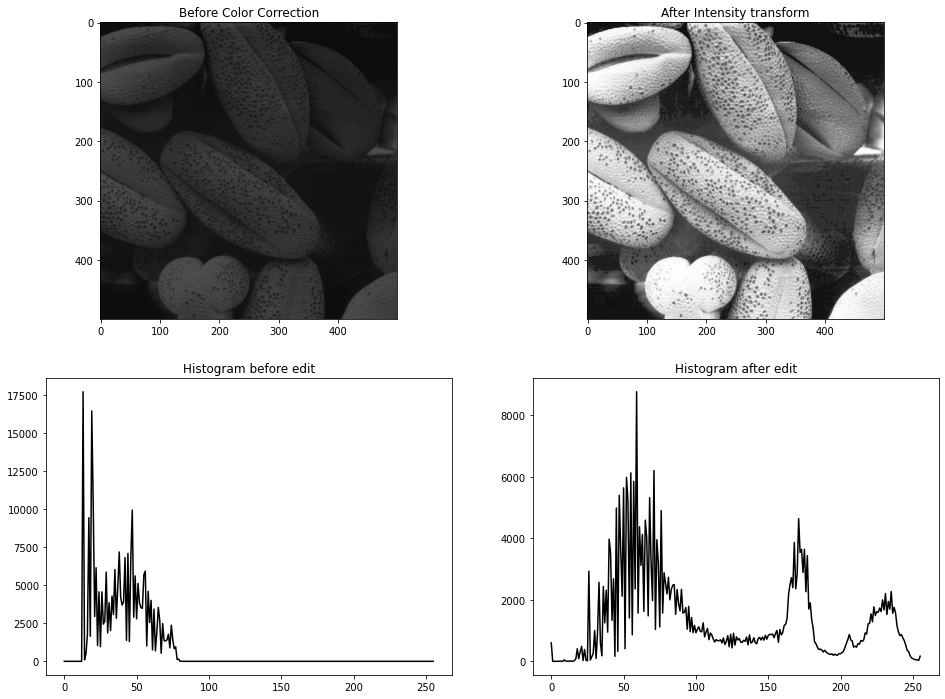

In [54]:
img_equlized = eqHist(img)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_equlized = cv.cvtColor(img_equlized, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(2, 2, figsize=(16, 12))

ax[0][0].set_title("Before Color Correction")
ax[0][0].imshow(img)

ax[0][1].set_title("After Intensity transform")
ax[0][1].imshow(img_equlized )

ax[1][0].set_title("Histogram before edit")
ax[1][0].plot(cv.calcHist([img], [0], None, [256], [0,256]), 'k')

ax[1][1].set_title("Histogram after edit")
ax[1][1].plot(cv.calcHist([img_edit], [0], None, [256], [0,256]), 'k')

plt.show()

## Question 5

### Nearest Neighbour interpolation method

In [57]:
def zoom_image_nearest_neighbour(image, scale = 2):
    new_shape = image.shape[0] * scale, image.shape[1] * scale , image.shape[2]
    
    zoomed_image = np.zeros(new_shape, dtype = 'uint8')
    for i in range(new_shape[0]):
        for j in range(new_shape[1]):
            location = [round(i/scale), round(j/scale)]
            
            if location[0] >= image.shape[0]:
                location[0] = image.shape[0] - 1
            
            if location[1] >= image.shape[1]:
                location[1] = image.shape[1] - 1
            
            zoomed_image[i, j] = image[location[0], location[1]]
            
    return zoomed_image

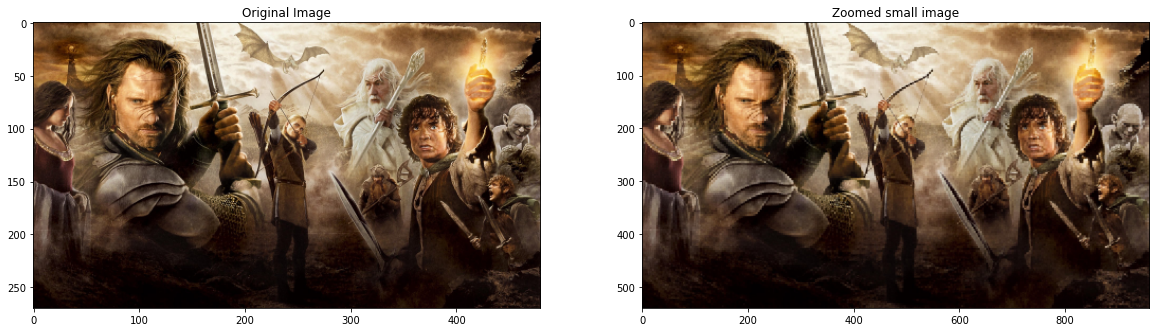

In [84]:
img_original = cv.imread(r'a1q5images\im01small.png', cv.IMREAD_COLOR)
assert img_original is not None

zoomed_img = zoom_image_nearest_neighbour(img_original, scale = 2)

# do color convertion
img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
zoomed_img = cv.cvtColor(zoomed_img, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].set_title("Original Image")
ax[0].imshow(img_original)

ax[1].set_title("Zoomed small image")
ax[1].imshow(zoomed_img)

plt.show()

In [59]:
def zoom_image_bilinear(image, scale = 2):
    new_shape = image.shape[0] * scale, image.shape[1] * scale , image.shape[2]
    zoomed_image = np.zeros(new_shape, dtype = 'uint8')
    
    for i in range(new_shape[0]):
        for j in range(new_shape[1]):

            location = [i/scale, j/scale]

            a,b = floor(location[0]), ceil(location[0])
            c,d = floor(location[1]), ceil(location[1])

            if a == b or c == d:
                location[0] = round(location[0])
                location[1] = round(location[1])
                if location[0] >= image.shape[0]:
                    location[0] = image.shape[0] - 1
                if location[1] >= image.shape[1]:
                    location[1] = image.shape[1] - 1
                    
                zoomed_image[i,j] = image[location[0], location[1]]
            else:
                if b >= image.shape[0]:
                    b = image.shape[0] - 1

                if d >= image.shape[1]:
                    d = image.shape[1] - 1

                p_c_4 = [image[a,c], image[b,c], image[a,d], image[b,d]]
                p_c_2 = [
                    p_c_4[0] * (location[1] - c) + p_c_4[2] * (d - location[1]),
                    p_c_4[1] * (location[1] - c) + p_c_4[3] * (d - location[1])
                ]
                p_c = p_c_2[0] * (location[0] - a) + p_c_2[1] * (b - location[0])

            #             print(location,a,b,c,d)
    #             print(location, a,b,c,d)
    #             print(p_c_4, end='\n\n')
    #             print(p_c_2, end='\n\n')

                zoomed_image[i, j] = p_c
    
    return zoomed_image

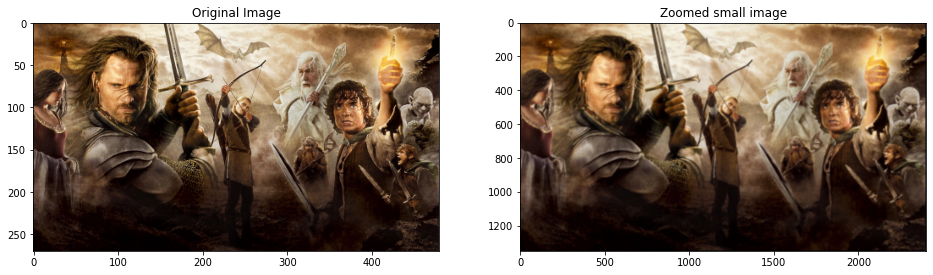

In [85]:
img_original = cv.imread(r'a1q5images\im01small.png', cv.IMREAD_COLOR)
assert img_original is not None

zoomed_img = zoom_image_bilinear(img_original, scale = 5)

cv.imwrite('zoomed_exp.png', zoomed_img)

# do color convertion
img_original = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
zoomed_img = cv.cvtColor(zoomed_img, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1,2, figsize=(16, 20))

ax[0].set_title("Original Image")
ax[0].imshow(img_original)

ax[1].set_title("Zoomed small image")
ax[1].imshow(zoomed_img)

plt.show()

In [68]:
## Calculating SSDs
originals = [r'im01.png', r'im02.png', r'im03.png']
small = [r'im01small.png',r'im02small.png',r'im03small.png']

SSD_nearest_neighbour = []
SSD_bilinear = []

for index, image in enumerate(small):
    img_small = cv.imread(r'a1q5images\\' + image, cv.IMREAD_COLOR)
    img_large = cv.imread(r'a1q5images\\' + originals[index], cv.IMREAD_COLOR)
    

    zoomed_img = zoom_image_nearest_neighbour(img_small, scale = 4)
    
    if(zoomed_img.shape != img_large.shape):
        if zoomed_img.shape[0] > img_large.shape[0]:
            zoomed_img = zoomed_img[:img_large.shape[0],:,:]
        else:
            img_large = img_large[:zoomed_img.shape[0],:,:]
            
        if zoomed_img.shape[1] > img_large.shape[1]:
            zoomed_img = zoomed_img[:,:img_large.shape[1],:]
        else:
            img_large = img_large[:,:zoomed_img.shape[1],:]
            
        if zoomed_img.shape[2] > img_large.shape[2]:
            zoomed_img = zoomed_img[:,:,:img_large.shape[2]]
        else:
            img_large = img_large[:,:,:zoomed_img.shape[2]]
      
    SSD = np.sum((img_large[:,:,0:3] - zoomed_img[:,:,0:3])**2)
    SSD_nearest_neighbour.append(SSD)
    
    zoomed_img = zoom_image_bilinear(img_small, scale = 4)
    
    if(zoomed_img.shape != img_large.shape):
        if zoomed_img.shape[0] > img_large.shape[0]:
            zoomed_img = zoomed_img[:img_large.shape[0],:,:]
        else:
            img_large = img_large[:zoomed_img.shape[0],:,:]
            
        if zoomed_img.shape[1] > img_large.shape[1]:
            zoomed_img = zoomed_img[:,:img_large.shape[1],:]
        else:
            img_large = img_large[:,:zoomed_img.shape[1],:]
            
        if zoomed_img.shape[2] > img_large.shape[2]:
            zoomed_img = zoomed_img[:,:,:img_large.shape[2]]
        else:
            img_large = img_large[:,:,:zoomed_img.shape[2]]
            
    SSD = np.sum((img_large[:,:,0:3] - zoomed_img[:,:,0:3])**2)
    SSD_bilinear.append(SSD)
    
    
print("SSD of nearest neighbour   ", SSD_nearest_neighbour)
print("SSD of bilinear            ", SSD_bilinear)

SSD of nearest neighbour    [249527129, 116073015, 249066650]
SSD of bilinear             [262734576, 123531518, 254015418]


In [74]:
#Normalizing

SSD_nearest_neighbour_normalized = [0,0,0]
SSD_bilinear_normalized = [0,0,0]

for index, image in enumerate(small):
    img_large = cv.imread(r'a1q5images\\' + originals[index], cv.IMREAD_COLOR)
    size = img_large.shape[0] * img_large.shape[1]
    SSD_nearest_neighbour_normalized[index] = SSD_nearest_neighbour[index] / size
    SSD_bilinear_normalized[index] = SSD_bilinear[index] / size

print("SSD of nearest neighbour normalized   ", list(map(round, SSD_nearest_neighbour_normalized)))
print("SSD of bilinear normalized           ", list(map(round, SSD_bilinear_normalized)))

SSD of nearest neighbour normalized    [120, 50, 71]
SSD of bilinear normalized            [127, 54, 73]


## Question 6

In [184]:
def yasiruFilter2D(image, filter_):
    
    border = int(filter_.shape[0] / 2)
    with_border_shape = image.shape[0] + border * 2, image.shape[1] + border * 2
    border_img = np.zeros(with_border_shape, dtype='float32')
    
    border_img[border:-border, border:-border] = image
    
    filtered_ = np.copy(image)
    
    for i in range(image.shape[0]-1):
        for j in range(image.shape[1]-1):
            filtered_[i+1, j+1] = np.sum(border_img[i:i+3, j:j+3] * filter_)
    
    return filtered_

In [185]:
def filter1D_combination(image):

    y = np.array([[1],[2],[1]])
    x = np.array([1, 0, -1])
    
    border = int(3 / 2)
    with_border_shape = image.shape[0] + border * 2, image.shape[1] + border * 2
    border_img = np.zeros(with_border_shape, dtype='float32')
    
    border_img[border:-border, border:-border] = image
    
    filtered_ = np.copy(image)

    for i in range(image.shape[0]-1):
        for j in range(image.shape[1]-1):
            filtered_[i+1, j+1] = np.sum(border_img[i+1, j:j+3] * y)
            
    for i in range(image.shape[0]-1):
        for j in range(image.shape[1]-1):
            filtered_[i+1, j+1] = np.sum(border_img[i:i+3, j+1] * x)        
    
    return filtered_

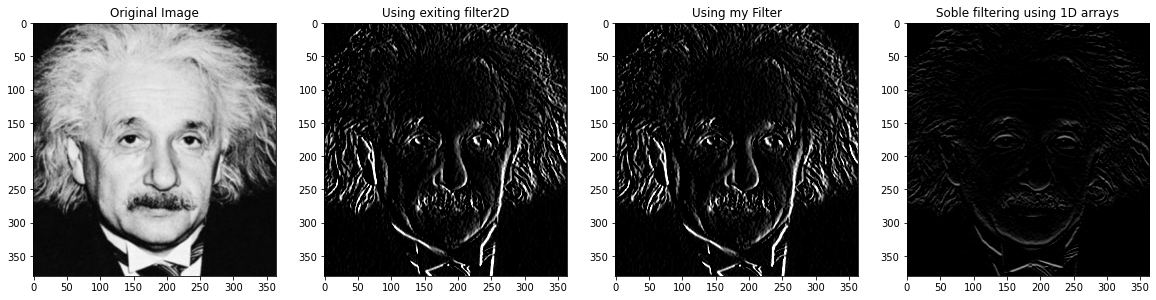

In [188]:
img = cv.imread(r'einstein.png', cv.IMREAD_GRAYSCALE).astype('float32')
assert img is not None

sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype='float32')

img_filtered = cv.filter2D(img, -1, sobel)
img_filtered_yasiru = yasiruFilter2D(img, sobel)
img_filtered_1D_comb = filter1D_combination(img)

_, ax = plt.subplots(1, 4, figsize=(20, 12))

ax[0].set_title("Original Image")
ax[0].imshow(img, cmap='gray')

ax[1].set_title("Using exiting filter2D")
ax[1].imshow(img_filtered, cmap='gray', vmin=0, vmax=255)

ax[2].set_title("Using my Filter")
ax[2].imshow(img_filtered_yasiru, cmap='gray', vmin=0, vmax=255)

ax[3].set_title("Soble filtering using 1D arrays")
ax[3].imshow(img_filtered_1D_comb, cmap='gray', vmin=0, vmax=255)

plt.show()

## Question 7

### Part 1

In [249]:
img = cv.imread(r'daisy.jpg', cv.IMREAD_COLOR)
assert img is not None

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,130, img.shape[1] - 1, img.shape[0] - 1)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

img_fore = img*mask2[:,:,np.newaxis]

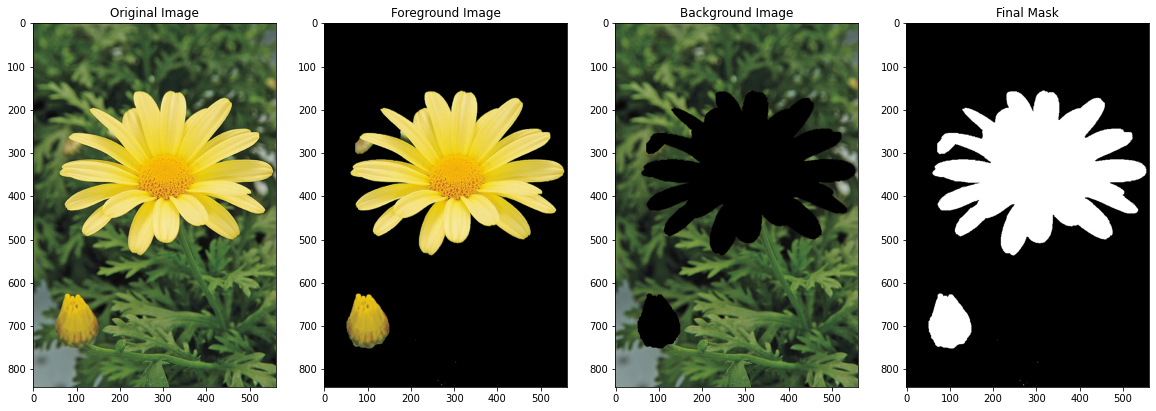

In [252]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_fore = cv.cvtColor(img_fore, cv.COLOR_BGR2RGB)

_, ax = plt.subplots(1, 4, figsize=(20, 12))

ax[0].set_title("Original Image")
ax[0].imshow(img)

ax[1].set_title("Foreground Image")
ax[1].imshow(img_fore)

ax[2].set_title("Background Image")
ax[2].imshow(img - img_fore)

ax[3].set_title("Final Mask")
ax[3].imshow(mask2, cmap='gray')

plt.show()

### Part 2

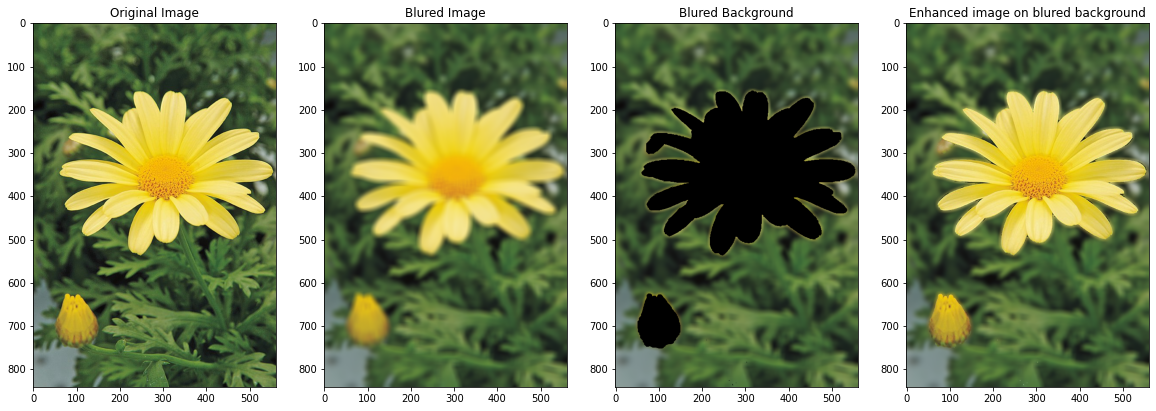

In [275]:
img_blur = cv.GaussianBlur(img, (15,15), 20)
blured_background = img_blur - img_blur*mask2[:,:,np.newaxis]

_, ax = plt.subplots(1, 4, figsize=(20, 12))

ax[0].set_title("Original Image")
ax[0].imshow(img)

ax[1].set_title("Blured Image")
ax[1].imshow(img_blur)

ax[2].set_title("Blured Background")
ax[2].imshow(blured_background)

ax[3].set_title("Enhanced image on blured background")
ax[3].imshow(blured_background + img_fore)

plt.show()